In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("retailstore.csv")
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [18]:
df.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

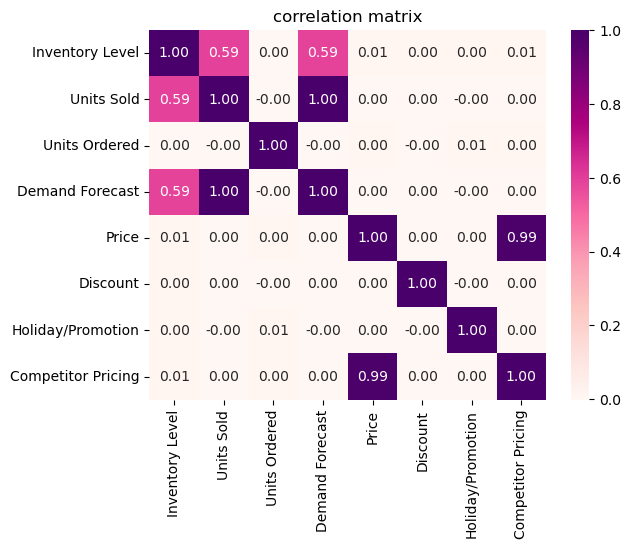

In [19]:
num=df.select_dtypes(include=[float,int])
corrmat=num.corr()
sns.heatmap(corrmat,annot=True,cmap='RdPu',fmt=".2f")
plt.title("correlation matrix")
plt.show()

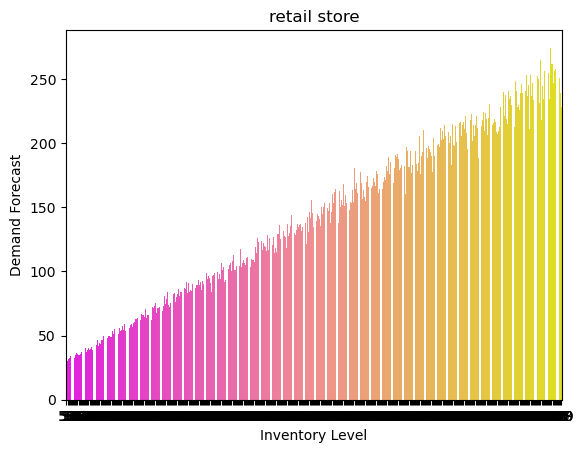

In [21]:
sns.barplot(data=df,x='Inventory Level',y='Demand Forecast',palette='spring', errorbar=None)
plt.title("retail store" )
plt.xlabel("Inventory Level")
plt.ylabel("Demand Forecast")
plt.show()

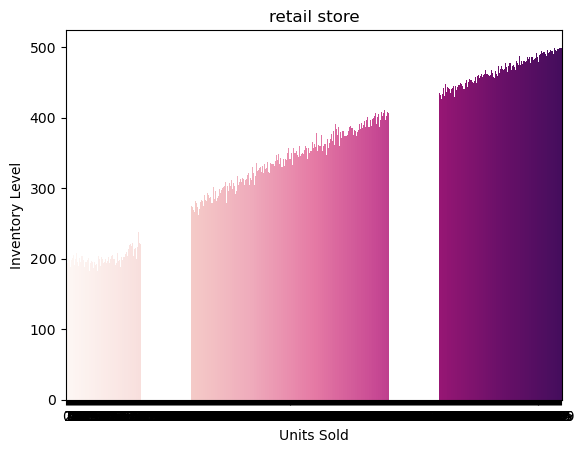

In [25]:
sns.barplot(data=df,x='Units Sold',y='Inventory Level',palette='RdPu', errorbar=None)
plt.title("retail store" )
plt.xlabel("Units Sold")
plt.ylabel("Inventory Level")
plt.show()

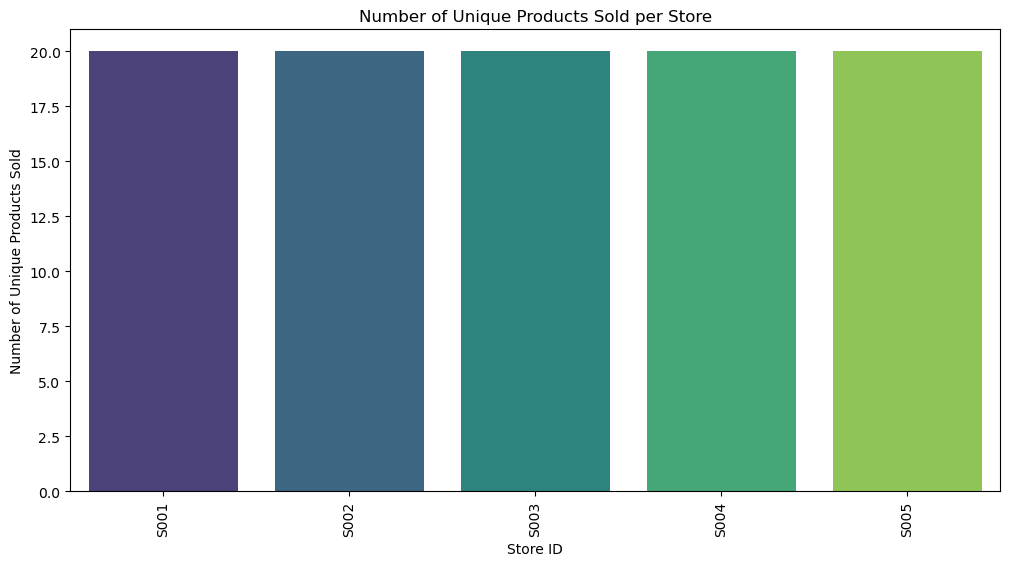

In [26]:
 
store_products = df.groupby("Store ID")["Product ID"].nunique().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=store_products.index, y=store_products.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Store ID")
plt.ylabel("Number of Unique Products Sold")
plt.title("Number of Unique Products Sold per Store")
plt.show()


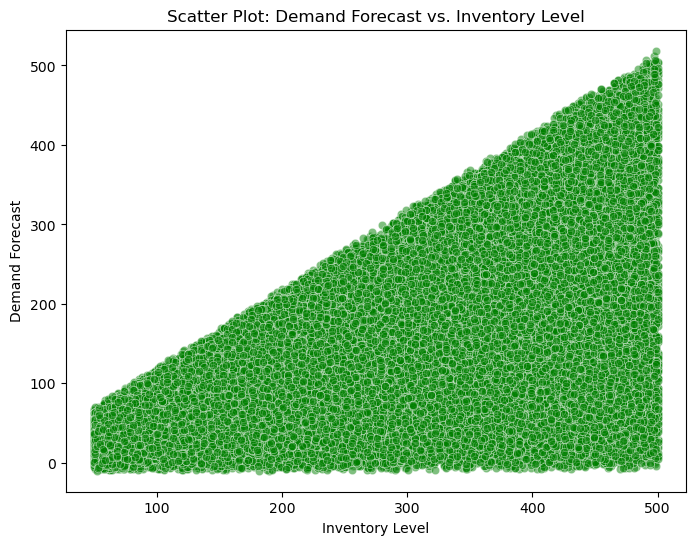

In [37]:
# Scatter plot: Demand Forecast vs. Inventory Level
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Inventory Level"], y=df["Demand Forecast"], alpha=0.5, color="green")
plt.title("Scatter Plot: Demand Forecast vs. Inventory Level")
plt.xlabel("Inventory Level")
plt.ylabel("Demand Forecast")
plt.show()

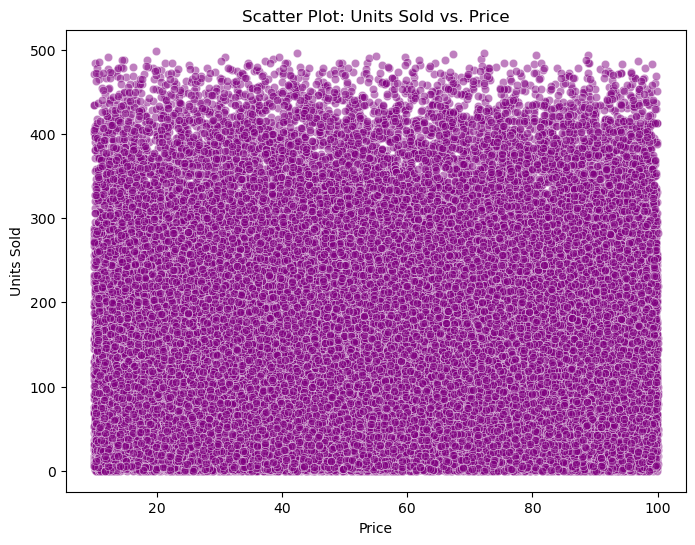

In [36]:
# Scatter plot: Units Sold vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Price"], y=df["Units Sold"], alpha=0.5, color="purple")
plt.title("Scatter Plot: Units Sold vs. Price")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.show()

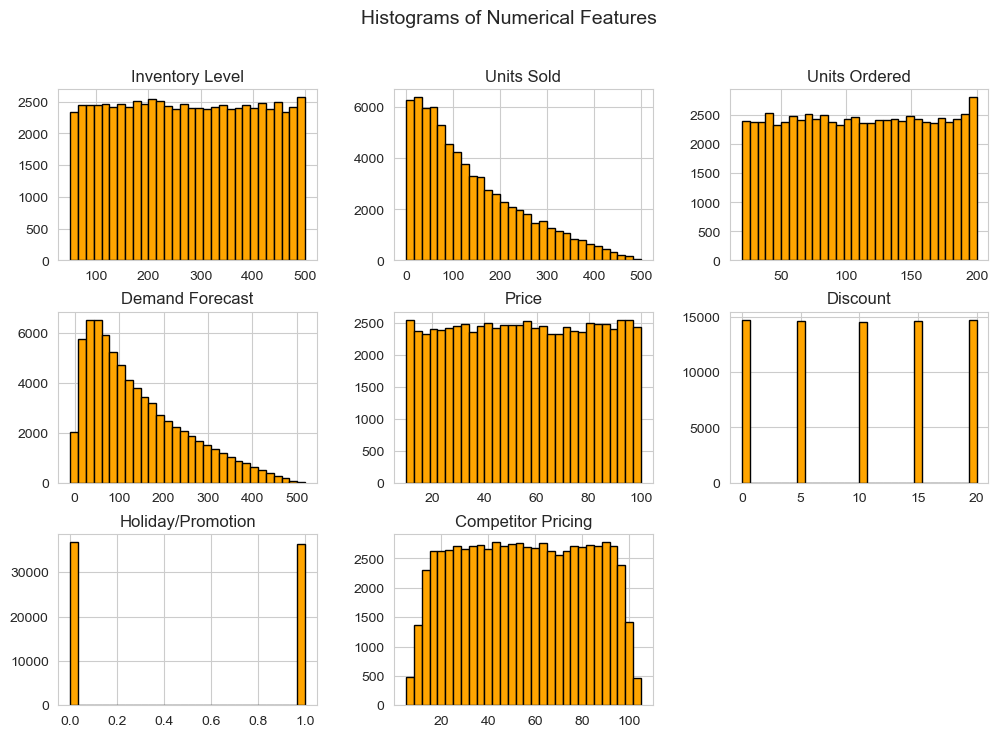

In [39]:
sns.set_style("whitegrid")
# Histogram
df.hist(figsize=(12, 8), bins=30, edgecolor="black", color="orange")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()


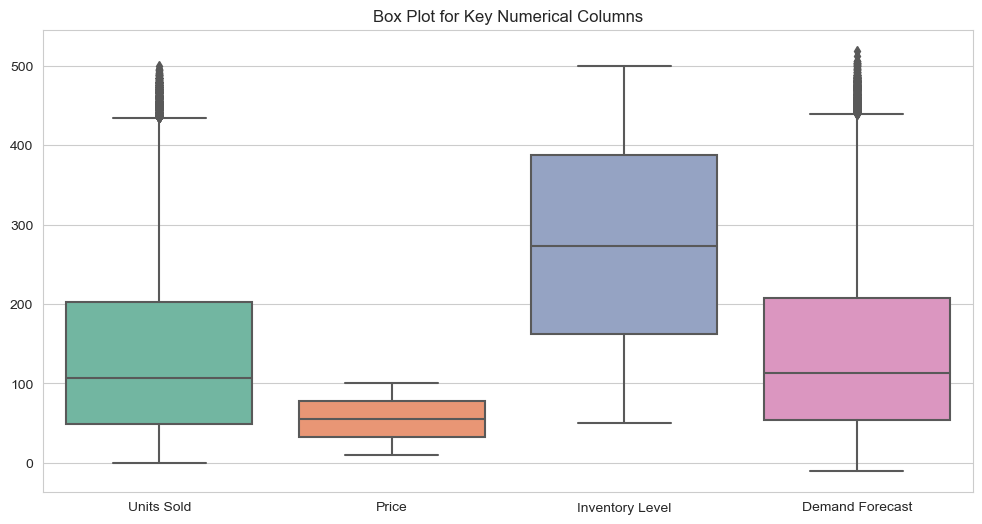

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Units Sold", "Price", "Inventory Level", "Demand Forecast"]], palette="Set2")
plt.title("Box Plot for Key Numerical Columns")
plt.show()


C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


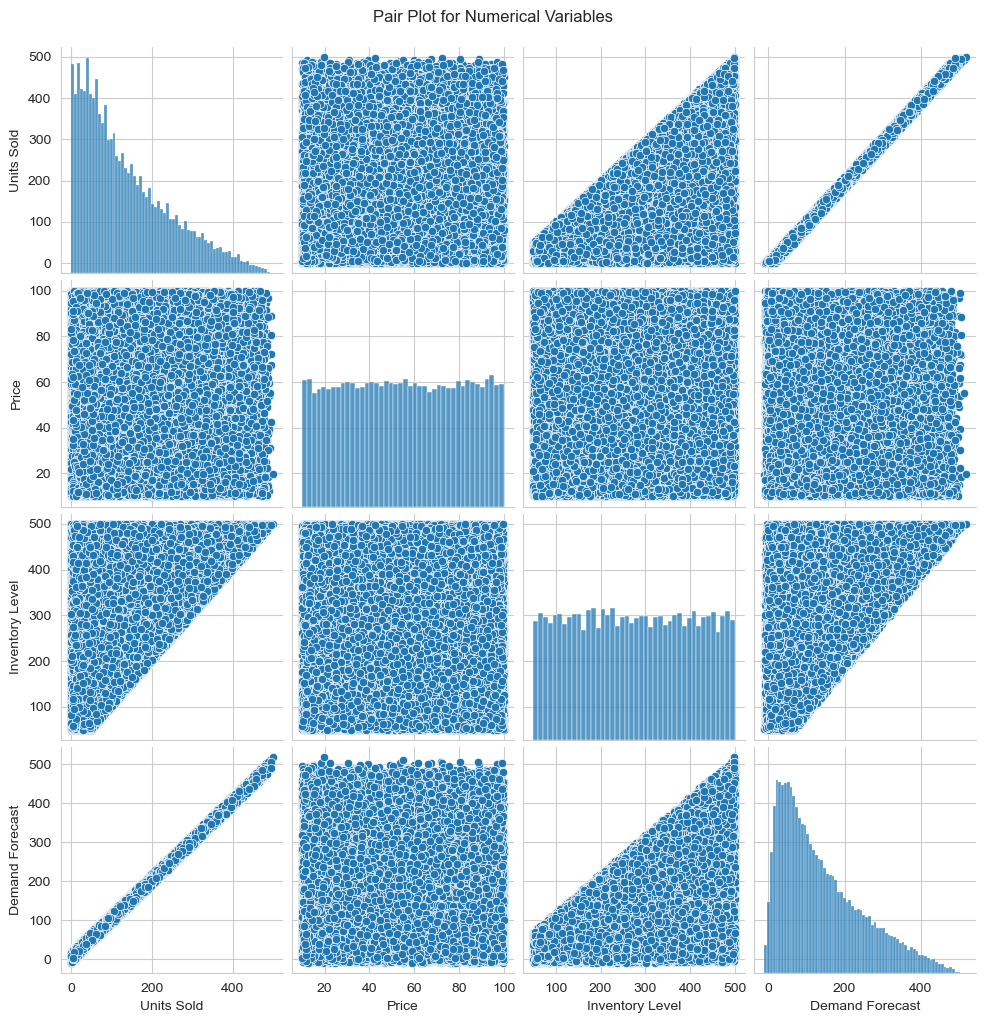

In [41]:

sns.pairplot(df[["Units Sold", "Price", "Inventory Level", "Demand Forecast"]])
plt.suptitle("Pair Plot for Numerical Variables", y=1.02)
plt.show()


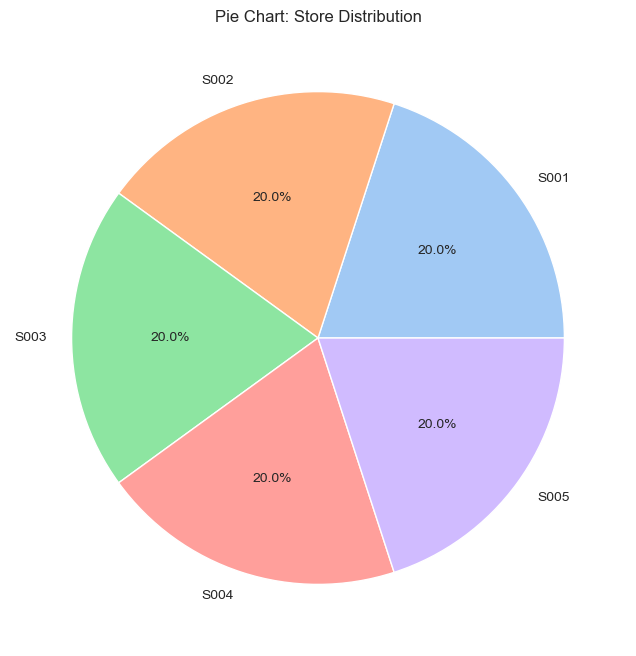

In [44]:
plt.figure(figsize=(8, 8))
df["Store ID"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Pie Chart: Store Distribution")
plt.ylabel("")  # Remove default y-label
plt.show()


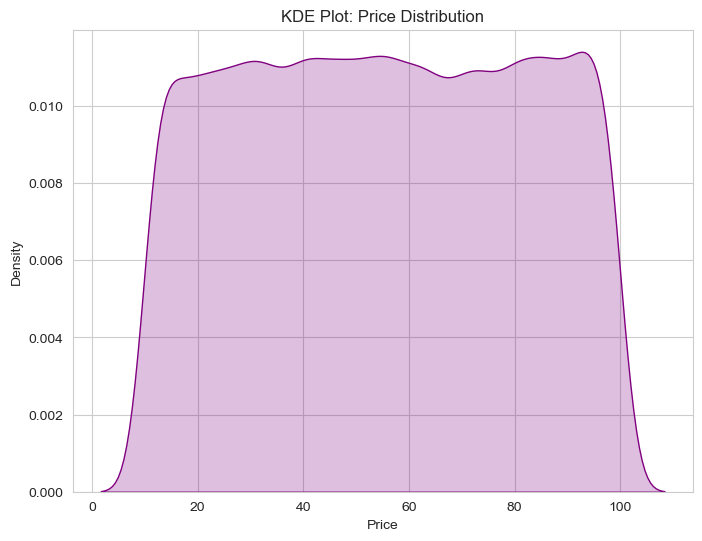

In [46]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df["Price"], fill=True, color="purple")
plt.title("KDE Plot: Price Distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()


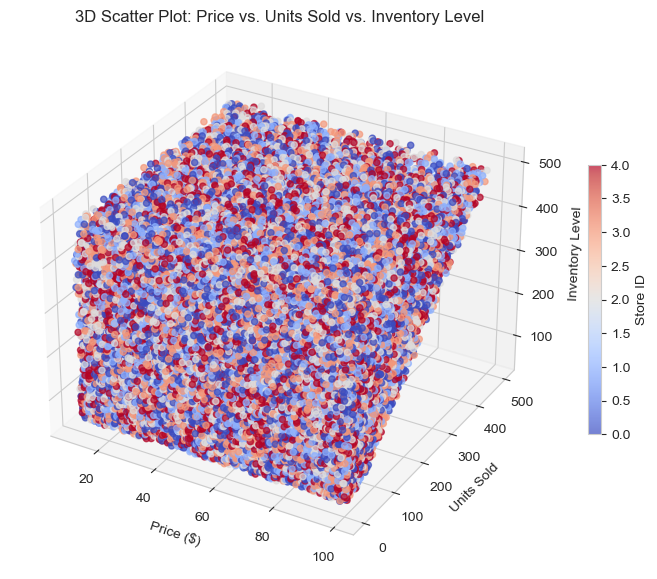

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert 'Store ID' to numeric if it's categorical
df["Store ID"] = df["Store ID"].astype("category").cat.codes

# Create figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with corrected color mapping
scatter = ax.scatter(df["Price"], df["Units Sold"], df["Inventory Level"], 
                     c=df["Store ID"], cmap="coolwarm", alpha=0.7)

# Labels
ax.set_xlabel("Price ($)")
ax.set_ylabel("Units Sold")
ax.set_zlabel("Inventory Level")
plt.title("3D Scatter Plot: Price vs. Units Sold vs. Inventory Level")

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label("Store ID")

# Show plot
plt.show()


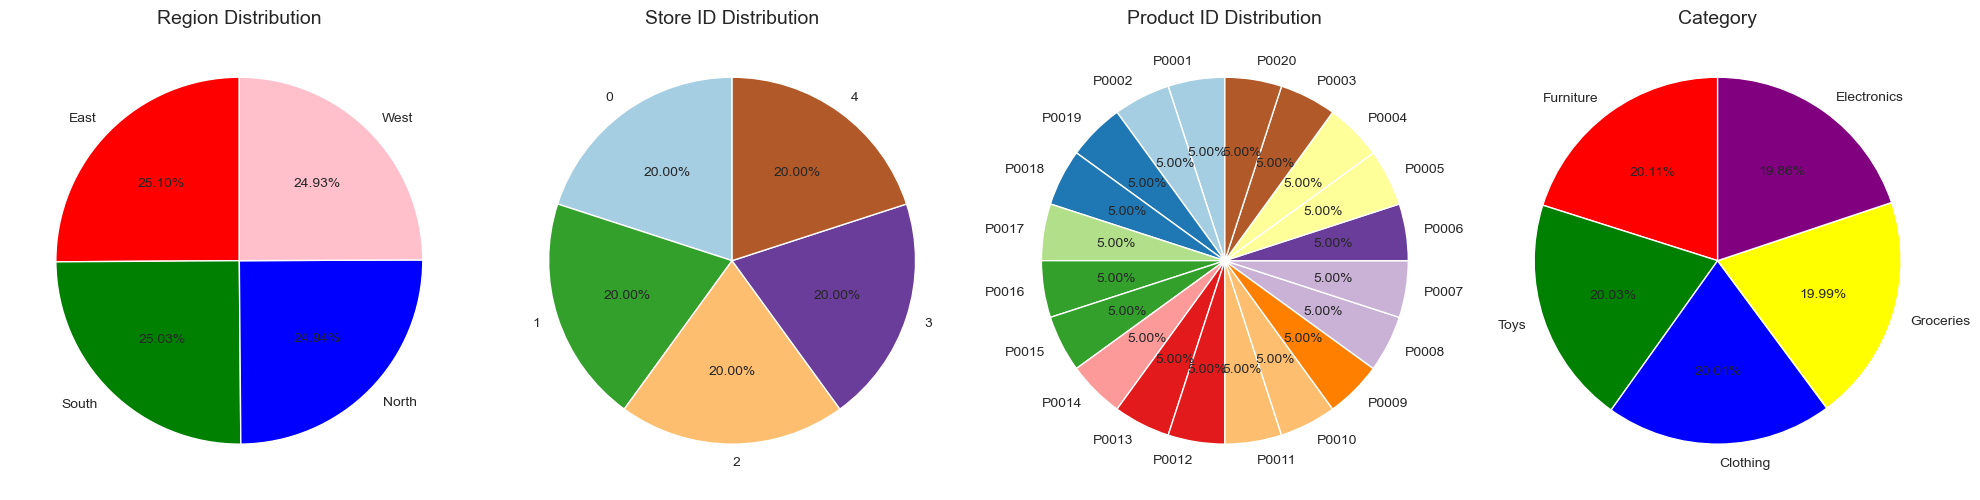

In [55]:
 import matplotlib.pyplot as plt
import numpy as np

# Set figure size
plt.rcParams["figure.figsize"] = (20, 10)

# Define a 1x4 subplot layout
fig, axes = plt.subplots(1, 4)

if "Region" in df.columns:
    size = df["Region"].value_counts()
    labels = size.index
    colors = ["red", "green", "blue","pink"]
    
    axes[0].pie(size, labels=labels, colors=colors, autopct="%.2f%%", startangle=90)
    axes[0].set_title("Region Distribution", fontsize=14)

if "Store ID" in df.columns:
    size = df["Store ID"].value_counts()
    labels = size.index
    colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

    axes[1].pie(size, labels=labels, colors=colors, autopct="%.2f%%", startangle=90)
    axes[1].set_title("Store ID Distribution", fontsize=14)

if "Product ID" in df.columns:
    size = df["Product ID"].value_counts()
    labels = size.index
    colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

    axes[2].pie(size, labels=labels, colors=colors, autopct="%.2f%%", startangle=90)
    axes[2].set_title("Product ID Distribution", fontsize=14)

if "Category" in df.columns:
    size = df["Category"].value_counts()
    labels = size.index
    colors = ["red", "green", "blue","yellow","purple"]

    axes[3].pie(size, labels=labels, colors=colors, autopct="%.2f%%", startangle=90)
    axes[3].set_title("Category", fontsize=14)

plt.tight_layout()
plt.show()


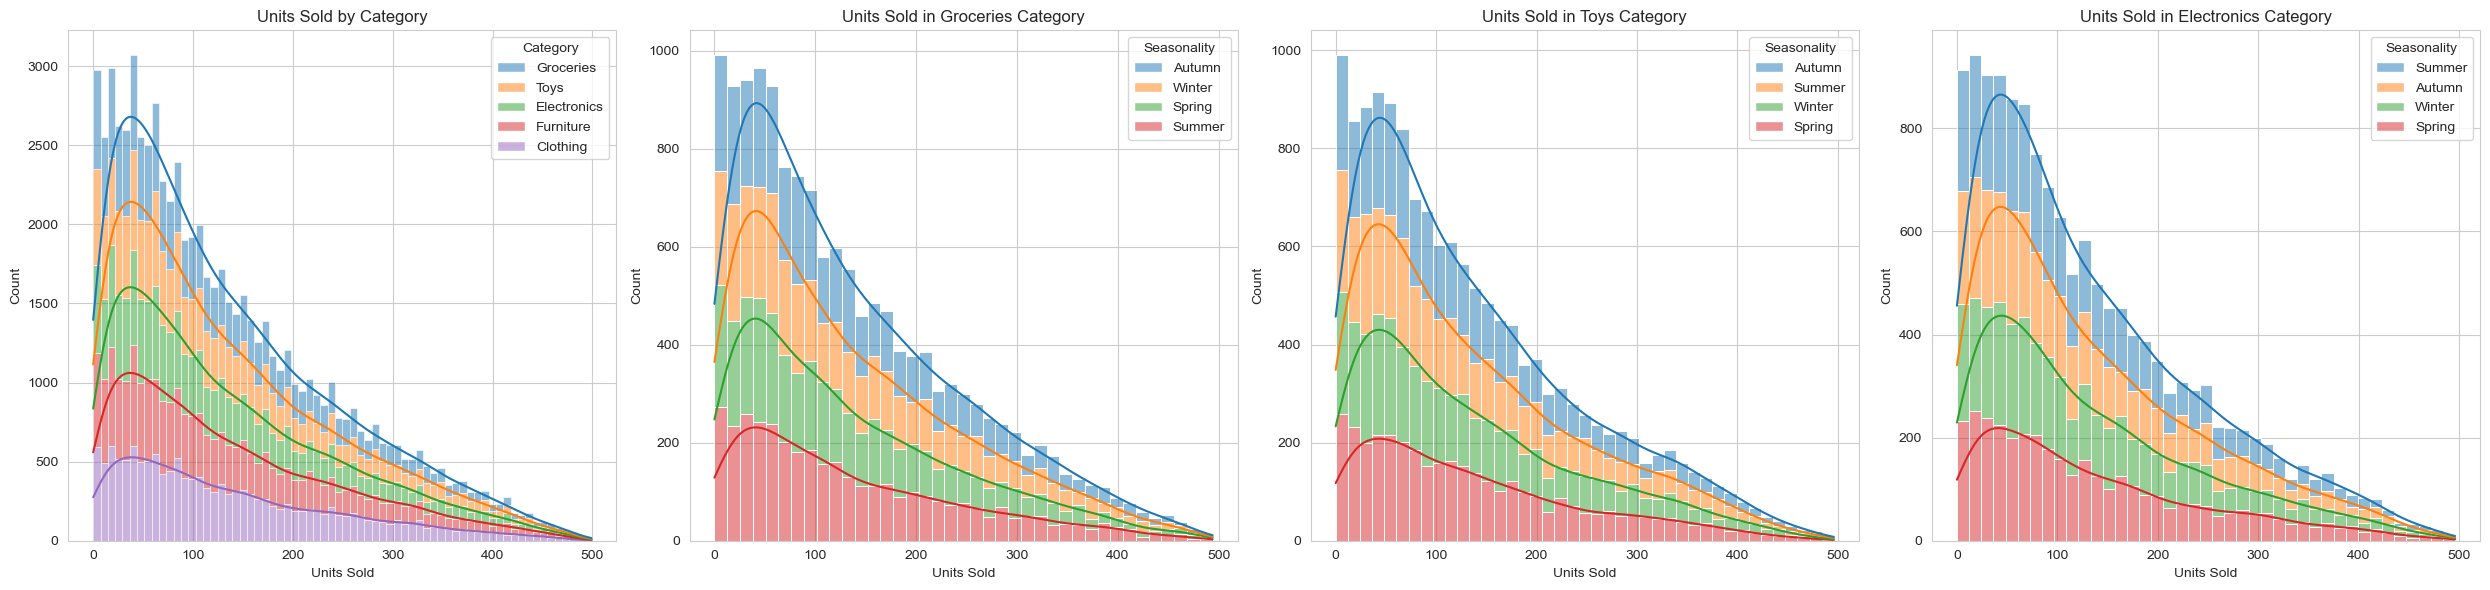

In [57]:
# Create the subplots for the categories
plt.subplots(1, 4, figsize=(25, 6))

# Plot 1: Distribution of Units Sold by Category
plt.subplot(141)
sns.histplot(data=df, x='Units Sold', kde=True, hue='Category', multiple='stack')
plt.title('Units Sold by Category')

# Plot 2: Distribution of Units Sold for Groceries Category
plt.subplot(142)
sns.histplot(data=df[df.Category == 'Groceries'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Groceries Category')

# Plot 3: Distribution of Units Sold for Toys Category
plt.subplot(143)
sns.histplot(data=df[df.Category == 'Toys'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Toys Category')

# Plot 4: Distribution of Units Sold for Electronics Category
plt.subplot(144)
sns.histplot(data=df[df.Category == 'Electronics'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Electronics Category')

# Show the plots
plt.tight_layout()
plt.show()

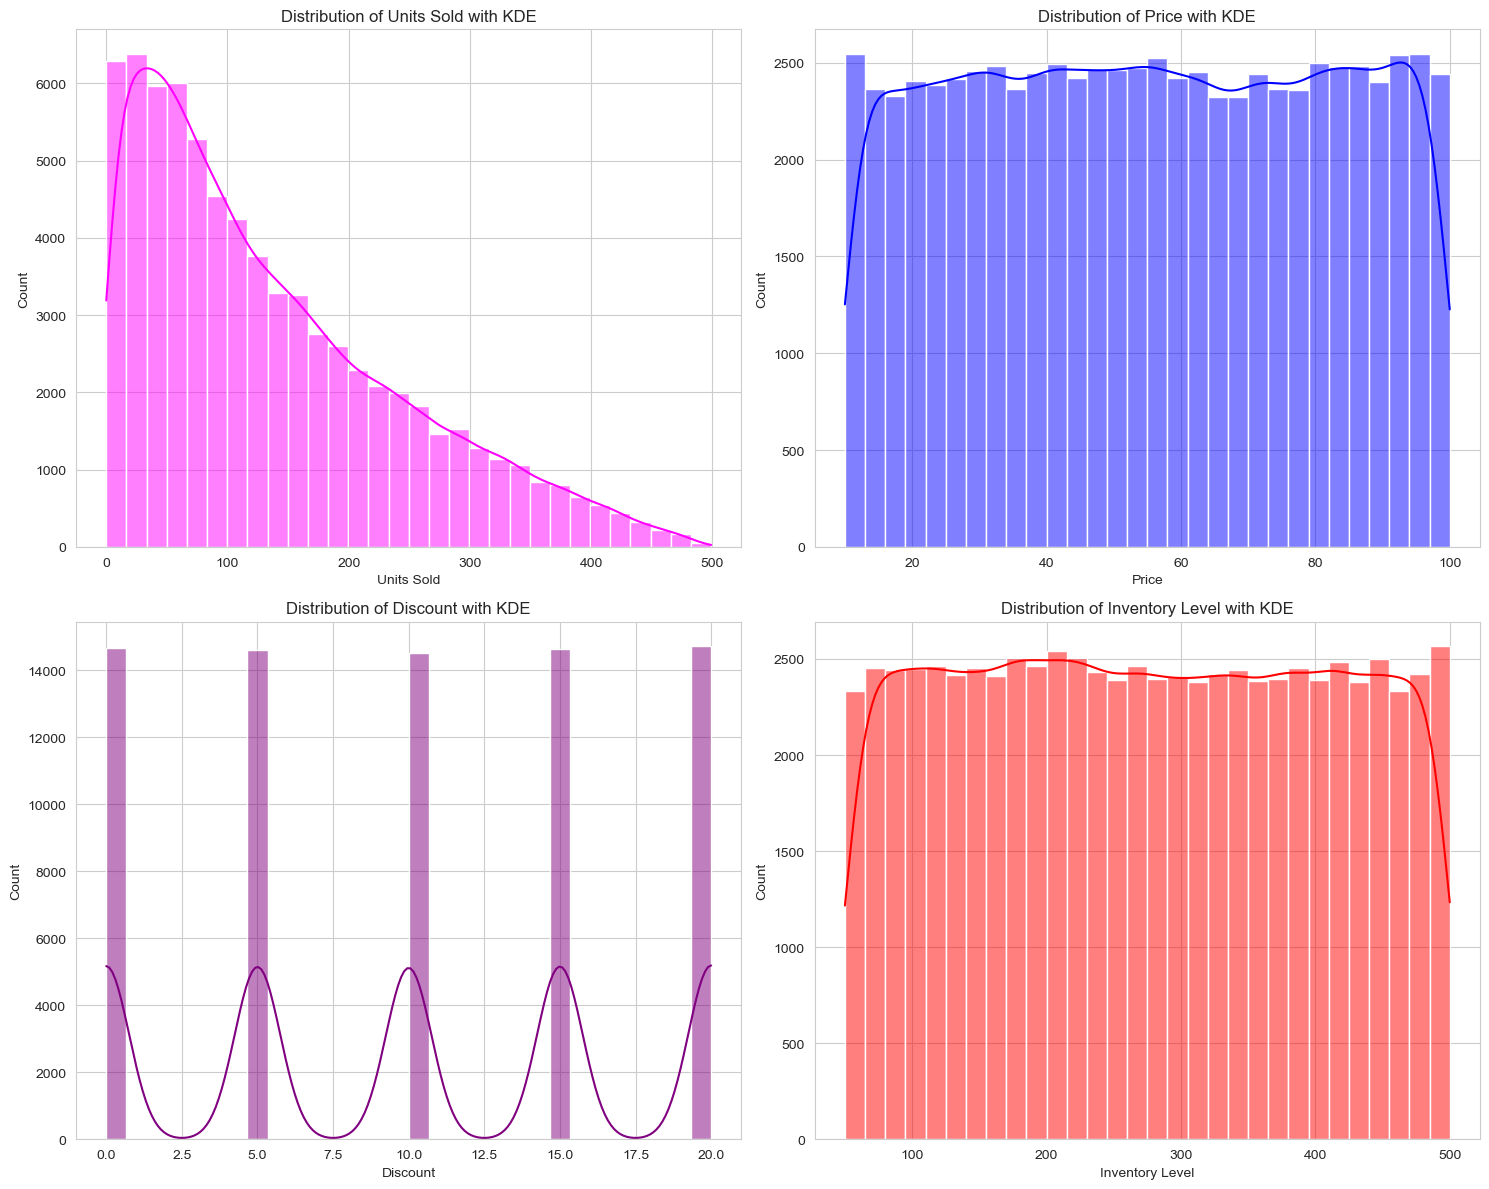

In [59]:
# Create the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Histogram and KDE for Units Sold
plt.subplot(221)
sns.histplot(data=df, x='Units Sold', bins=30, kde=True, color='magenta')
plt.title('Distribution of Units Sold with KDE')

# Plot 2: Histogram and KDE for Price
plt.subplot(222)
sns.histplot(data=df, x='Price', bins=30, kde=True, color='blue')
plt.title('Distribution of Price with KDE')

# Plot 3: Histogram and KDE for Discount
plt.subplot(223)
sns.histplot(data=df, x='Discount', bins=30, kde=True, color='purple')
plt.title('Distribution of Discount with KDE')

# Plot 4: Histogram and KDE for Inventory Level
plt.subplot(224)
sns.histplot(data=df, x='Inventory Level', bins=30, kde=True, color='red')
plt.title('Distribution of Inventory Level with KDE')

# Show the plots
plt.tight_layout()
plt.show()

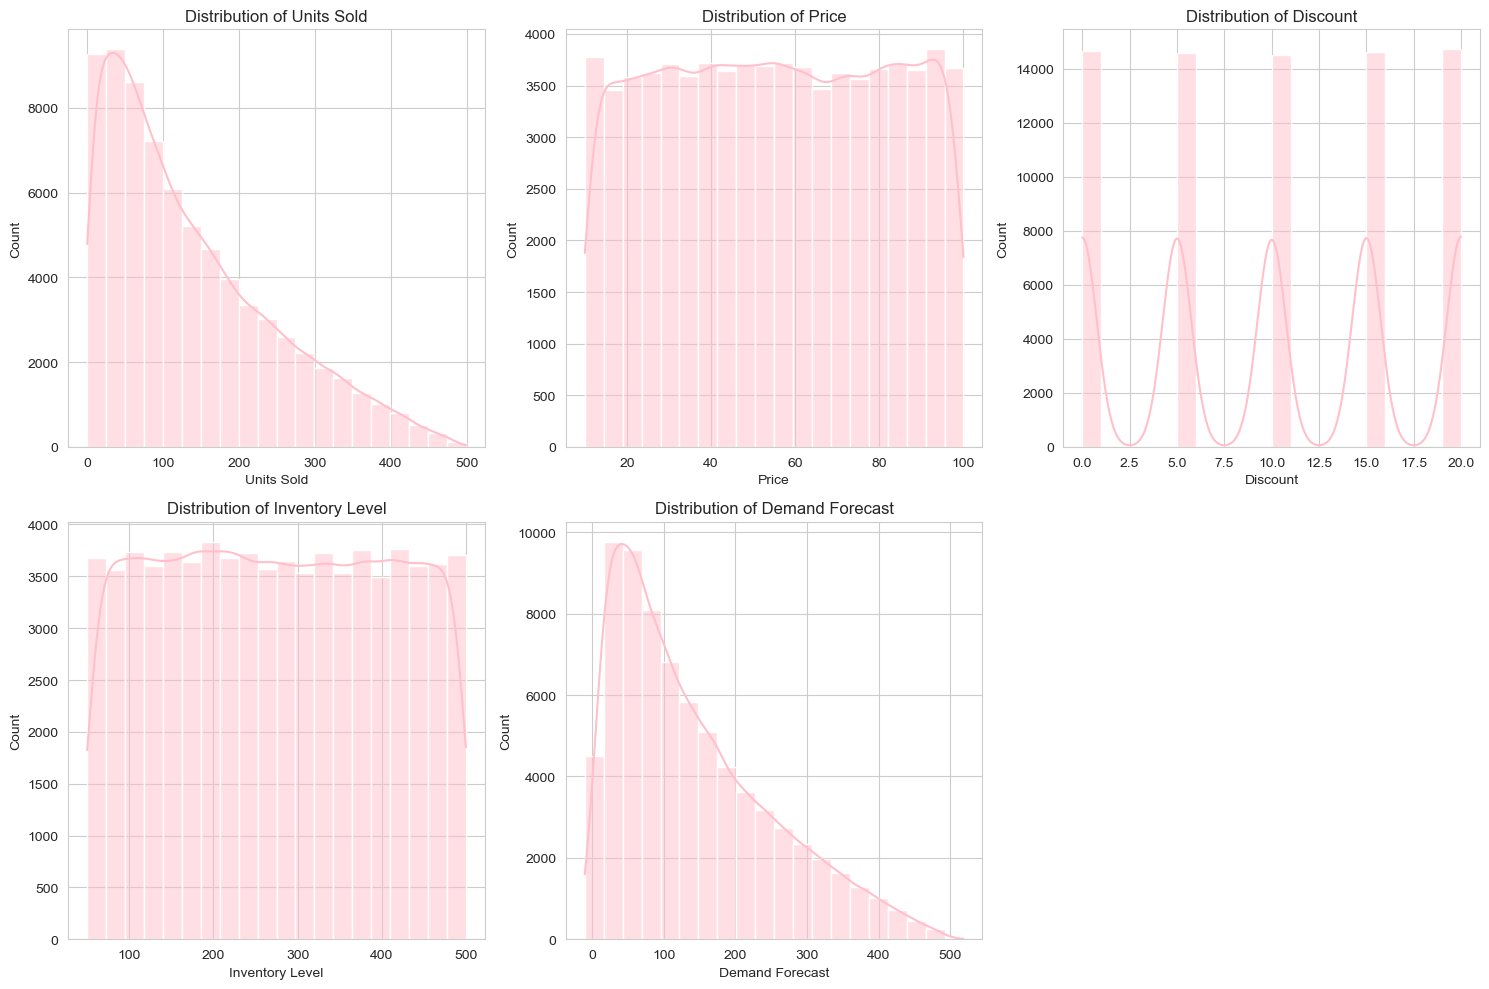

In [62]:
# List of continuous variables
continuous_vars = ['Units Sold', 'Price', 'Discount', 'Inventory Level', 'Demand Forecast']

plt.figure(figsize=(15, 10))

# Create histograms for continuous variables
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True, bins=20, color='pink')
    plt.title(f"Distribution of {var}")

plt.tight_layout()
plt.show()


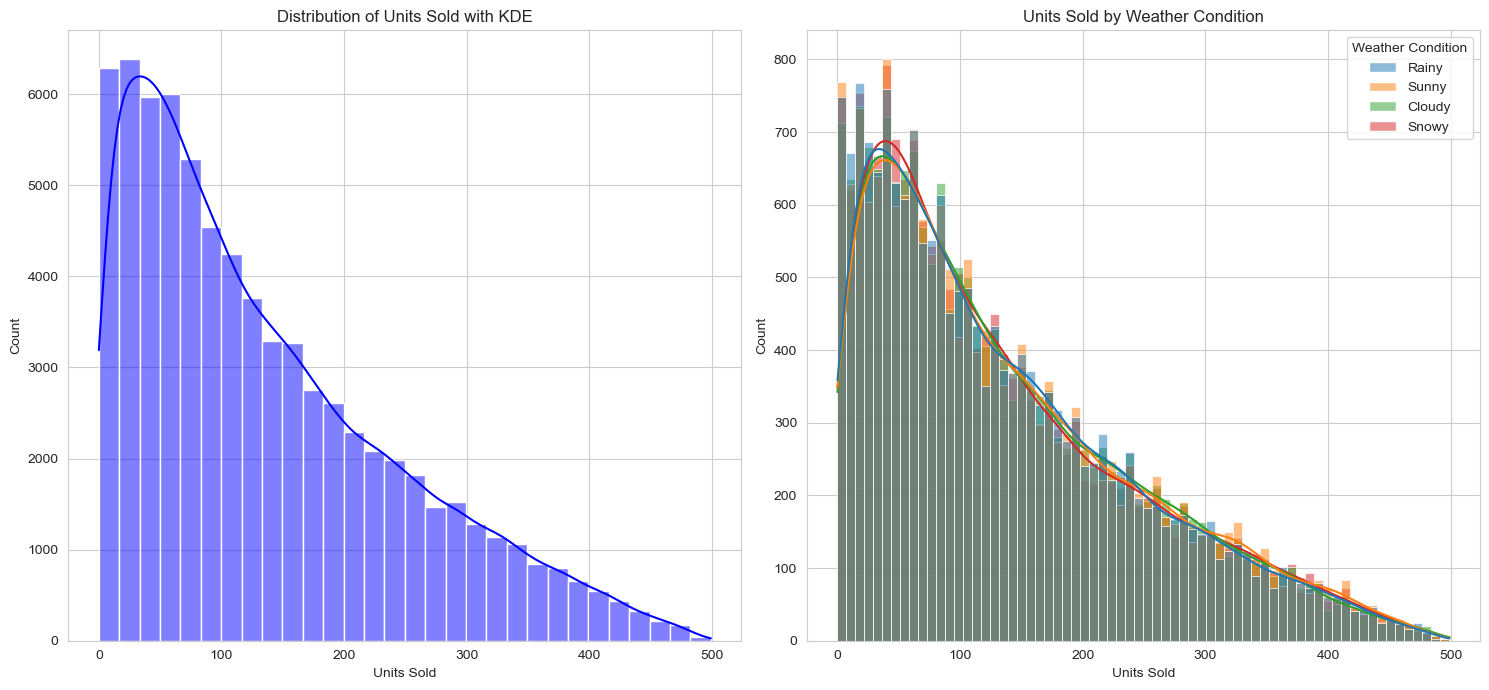

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram and KDE for Units Sold
plt.subplot(121)
sns.histplot(data=df, x='Units Sold', bins=30, kde=True, color='blue')
plt.title('Distribution of Units Sold with KDE')

# Plot 2: Histogram and KDE for Units Sold, categorized by Weather Condition
plt.subplot(122)
sns.histplot(data=df, x='Units Sold', kde=True, hue='Weather Condition')
plt.title('Units Sold by Weather Condition')

# Show the plots
plt.tight_layout()
plt.show()